# WORKGROUP 1

## Part 1: Math

# Frisch-Waugh-Lovell theorem proff

We have the following equation:
$$y=D\beta_1+W\beta_2+\mu$$

The Frisch-Waugh-Lovell Theorem states that we can obtain **$\beta_1$** through the alternative regression:
$$\epsilon^y=\epsilon^D*\phi+e$$

Because $\phi=\beta_1$


### First step

First, we regress:

$$W'y=W'D\hat{\beta_1}+W'W\hat{\beta_2}$$

So we obtain the estimated coefficient vector:

$$\hat{\beta_2}=(W'W)^{-1}W'y-(W'W)^{-1}W'D\hat{\beta_1}$$
$$\hat{\beta_2}=(W'W)^{-1}W'(y-D\hat{\beta_1})$$

### Second step

Then we regress:

$$D'y=D'D\hat{\beta_1}+D'W\hat{\beta_2}$$

And, using the equation from first step:

$$D'y=D'D\hat{\beta_1}+D'W((W'W)^{-1}W'(y-D\hat{\beta_1}))$$
$$D'y=(D'W)(W'W)^{-1}W'y-(D'W)(W'W)^{-1}W'\hat{\beta_1}+D'D\hat{\beta_1}))$$


### Third step

From the last equation, we solve for the $\hat{\beta_1}$ estimator:

$$\hat{\beta_1}= [D'(I-W(W'W)^{-1}W')D]^{-1}[D'(I-W(W'W)^{-1}W')y]$$

### Four step

Now we need to estimate the error vectors and regrest it:

#### 4.1

$$y=W\alpha_1+\epsilon^y$$

where:
$$\hat{\alpha_1}=(W'W)^{-1}W'y$$

So:

$$\hat{\epsilon}^y=y-W(W'W)^{-1}W'y$$
$$\hat{\epsilon}^y=[I-W(W'W)^{-1}W']y$$


#### 4.2

$$D=W\alpha_2+\epsilon^D$$

where:
$$\hat{\alpha_2}=(W'W)^{-1}W'D$$

So:

$$\hat{\epsilon}^D=D-W(W'W)^{-1}W'D$$
$$\hat{\epsilon}^D=[I-W(W'W)^{-1}W']D$$

#### 4.3

Finally, regress it:

$$\hat{\epsilon}^y=\hat{\epsilon}^D\phi+e$$

So we estimate $\phi$:

$$\hat{\phi}=(\hat{\epsilon}{^D}'\hat{\epsilon}{^D})^{-1}\hat{\epsilon}{^D}'\hat{\epsilon}{^y}$$

And we note that it is equal to:

$$\hat{\phi}=(D'[I-W(W'W)^{-1}W']'[I-W(W'W)^{-1}W']D)^{-1}D'[I-W(W'W)^{-1}W']'[I-W(W'W)^{-1}W']y$$

* Note that $[I-W(W'W)^{-1}W']'[I-W(W'W)^{-1}W']=I-W(W'W)^{-1}W'$

Finally, we had this:

$$\hat{\phi}=(D'[I-W(W'W)^{-1}W']D)^{-1}D'[I-W(W'W)^{-1}W']y$$


### Five step

We note that the last equation from the step four is the same from the step three!!!

$$\hat{\beta_1}= [D'(I-W(W'W)^{-1}W')D]^{-1}[D'(I-W(W'W)^{-1}W')y]$$
$$\hat{\phi}=(D'[I-W(W'W)^{-1}W']D)^{-1}D'[I-W(W'W)^{-1}W']y$$


Proven!



# The conditional Expectation Function minimizes expected squared error proof

We use the following equation:
$$Y=m(X)+e$$

$$m(X)=arg min_{g(X)}, E[(Y-g(X))^2]$$

Show that:

$$[(Y-g(X))^2]=E[(e)^2]$$


### First step

Adding $E[Y|X]$:

$$E[(Y-g(X))^2]=E[(Y-E[Y|X]+E[Y|X]-g(X))^2]$$
$$=E[(Y-E[Y|X])^2]+E[(E[Y|X]-g(X))^2]+2E[(Y-E[Y|X])]E[E[Y|X]-g(X)]$$

With the Law of Iterated Expectations:

$$E[E[(Y-E[Y|X])][E[Y|X]-g(X)]|X]$$
$$E[(E[Y|X]-E[Y|X])(E[Y|X]-g(X))]=0$$


### Second step

So now, the equation is:

$$E[(Y-g(X))^2]=E[(Y-E[Y|X])^2]+E[(E[Y|X]-g(X))^2]$$

The equation: $E[(E[Y|X]-g(X))^2]$ will never be negative because of the square, so we had that:

$$E[(Y-g(X))^2]>=E[(Y-E[Y|X])^2]$$

### Third step

If we minimize the squared errors, it will give us the following equality:

$$E[(Y-g(X))^2]>=E[(e)^2]$$


## Part 2: Replication

# An inferential problem: The Gender Wage Gap

We focus on the following inference question:

*What is the difference in predicted wages between men and women with the same job-relevant characteristics?*

Thus, we analyze if there is a difference in the payment of men and women (*gender wage gap*). The gender wage gap may partly reflect *discrimination* against women in the labor market or may partly reflect a *selection effect*, namely that women are relatively more likely to take on occupations that pay somewhat less (for example, school teaching).

To investigate the gender wage gap, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of men and women.

## Data analysis

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
#reading the data
data  = pd.read_csv('wage2015_subsample_inference.csv')

data['occ']=pd.Categorical(data.occ)
data['occ2']=pd.Categorical(data.occ2)
data['ind']=pd.Categorical(data.ind)
data['ind2']=pd.Categorical(data.ind2)

data.shape

(5150, 21)

In [3]:
data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

To start our (causal) analysis, we compare the sample means given gender:

In [4]:
# Filter the observations that have some type of university
data_filtered = data[(data["scl"] == 1) | (data["clg"] == 1) | (data["ad"] == 1)]

# droppings "shs" y "hsg" variables
data_filtered = data_filtered.drop(["shs", "hsg"], axis=1)
data_filtered.reset_index(drop=True, inplace=True)

Z = data_filtered[ ["lwage","sex","scl","clg","ad","ne","mw","so","we","exp1"] ]


In [5]:
data_female = data_filtered[data_filtered[ 'sex' ] == 1]
Z_female = data_female[ ["lwage","sex","scl","clg","ad","ne","mw","so","we","exp1"] ]

data_male = data_filtered[ data_filtered[ 'sex' ] == 0 ]
Z_male = data_male[ [ "lwage","sex","scl","clg","ad","ne","mw","so","we","exp1" ] ]


table = np.zeros( (10, 3) )
table[:, 0] = Z.mean().values
table[:, 1] = Z_male.mean().values
table[:, 2] = Z_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women']) # from table to dataframe
table_pandas.index = ["Log Wage","Sex","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]

table_pandas

,All,Men,Women
Log Wage,3.062748,3.099449,3.024417
Sex,0.489136,0.000000,1.000000
Some College,0.379438,0.405602,0.352113
Gollage Graduate,0.433492,0.436203,0.430661
Advanced Degree,0.187069,0.158195,0.217226
Northeast,0.229200,0.219917,0.238895
Midwest,0.249868,0.245851,0.254063
South,0.298357,0.303423,0.293066
West,0.222576,0.230809,0.213976
Experience,12.510201,12.202282,12.831798


In particular, the table above shows that the difference in average *logwage* between men and women is equal to $0,075$

In [6]:
data_female['lwage'].mean() - data_male['lwage'].mean()

-0.07503200512595809

Thus, the unconditional gender wage gap is about $7,5$\% for the group of never married workers (women get paid less on average in our sample). We also observe that never married working women are relatively more educated than working men and have lower working experience.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in python

In [7]:
#pip install statsmodels

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data_filtered )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
nocontrol_se2 = nocontrol_model.fit().summary2().tables[1]['Std.Err.']['sex']

# robust standar erros
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )

The estimated gender coefficient is -0.07503200512595651 and the corresponding standard error is 0.018373837141543257
The estimated gender coefficient is -0.07503200512595651 and the corresponding robust standard error is 0.018342600934807118 



Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

Let us run the ols regression with controls.

## Ols regression with controls

In [10]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'

control_model = smf.ols( formula = flex, data = data_filtered )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42]  # error standard for sex's coefficients 

print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]


Coefficient for OLS with controls -0.06753064145068145 and the corresponding robust standard error is 0.01679109653315367


,0,1
sex,-0.10181,-0.033251


The estimated regression coefficient $\beta_1\approx-0.0675$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $7.5$\% for women decreases to about $6.7$\% after controlling for worker characteristics.  


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

## Partialling-Out using ols

In [11]:
#Using frish waugh lovell
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = data_filtered ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = data_filtered ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )

# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
partial_fit.conf_int( alpha=0.05 ).loc[['t_D']]

Coefficient for D via partialling-out -0.0675197957923001 and the corresponding robust standard error is 0.01676933357176911


,0,1
t_D,-0.100711,-0.034329


In [12]:
#np.vstack(( t_Y.values , t_D.values )).T

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
data_res

,t_Y,t_D
0,-0.533381,0.053284
1,0.349121,-0.636719
2,-1.041085,0.402992
3,0.212196,0.322998
4,-0.436405,0.422943
...,...,...
3769,-0.531516,-0.450439
3770,-0.196759,-0.418884
3771,0.623516,0.511174
3772,-0.062624,0.042129


Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 


### Graphics of main variables 

In [13]:
import matplotlib.pyplot as plt

#### Wage

In [14]:
# Defining colors RGB format 
color_all = (1, 0.77, 0.44)  # RGB for 'All'
color_female = (1, 0.82, 0.89)  # RGB for 'Female'
color_male = (0.36, 0.73, 1)  # RGB for 'Male'

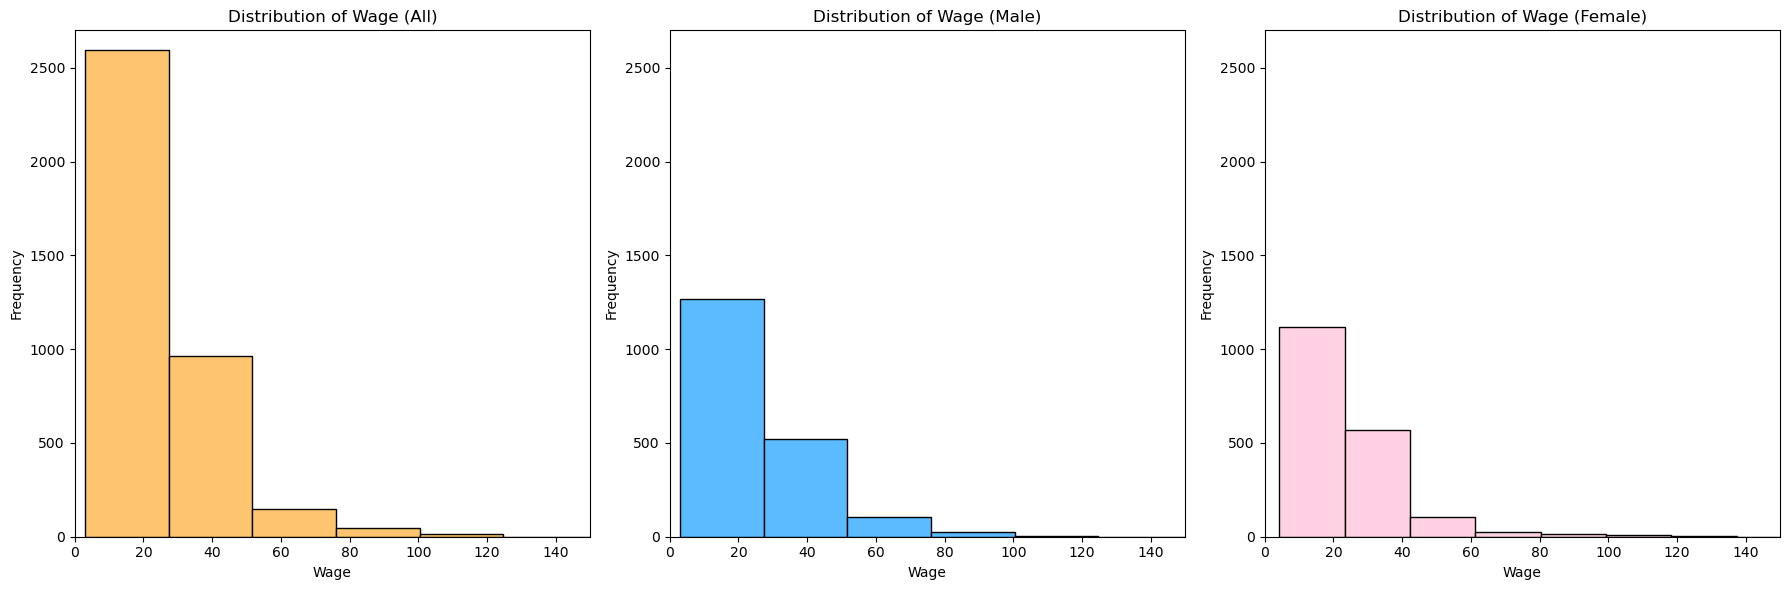

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(data_filtered['wage'], bins=20, color=color_all, edgecolor='black')
plt.ylim(0, 2700)
plt.xlim(0, 150)
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Wage (All)')

plt.subplot(1, 3, 2)
plt.hist(data_male['wage'], bins=20, color=color_male, edgecolor='black')
plt.ylim(0, 2700)
plt.xlim(0, 150)
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Wage (Male)')

plt.subplot(1, 3, 3)
plt.hist(data_female['wage'], bins=20, color=color_female, edgecolor='black')
plt.ylim(0, 2700)
plt.xlim(0, 150)
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Wage (Female)')

plt.tight_layout()

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\3599882121.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['wage'], shade=True, color=color_all)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\3599882121.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_female['wage'], shade=True, color=color_female)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\3599882121.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_male['wage'], shade=True, color=color_male)


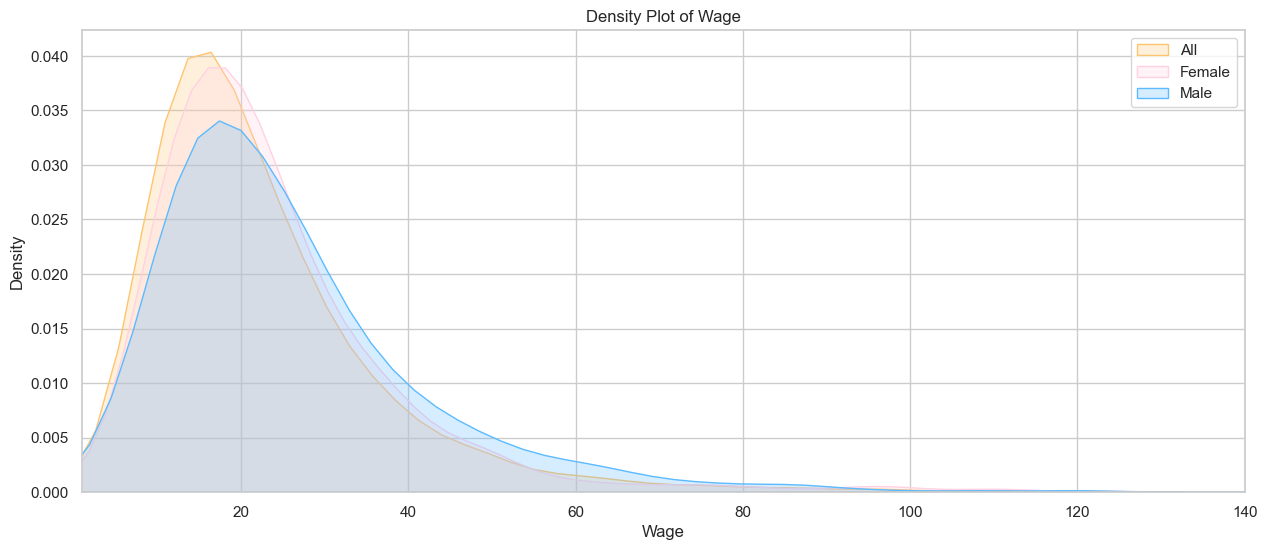

In [16]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))

sns.kdeplot(data['wage'], shade=True, color=color_all)
sns.kdeplot(data_female['wage'], shade=True, color=color_female)
sns.kdeplot(data_male['wage'], shade=True, color=color_male)

plt.legend(labels=[ 'All','Female', 'Male'])

plt.xlabel('Wage')
plt.ylabel('Density')
plt.title('Density Plot of Wage')
plt.xlim(1, 140)

plt.show()


In this graphic we can see that the variable "wage" doesn't follow a normal distribution

#### Log wage

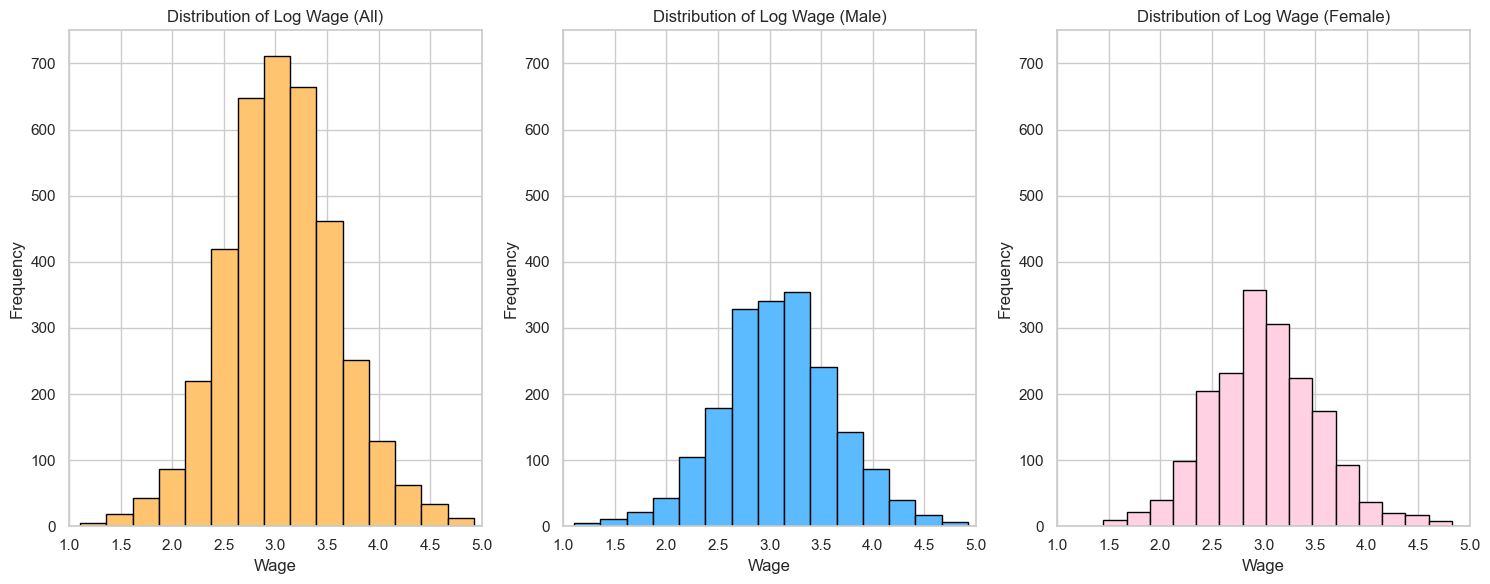

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(data_filtered['lwage'], bins=20, color=color_all, edgecolor='black')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.ylim(0, 750)
plt.xlim(1, 5)
plt.title('Distribution of Log Wage (All)')

plt.subplot(1, 3, 2)
plt.hist(data_male['lwage'], bins=20, color=color_male, edgecolor='black')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.ylim(0, 750)
plt.xlim(1, 5)
plt.title('Distribution of Log Wage (Male)')

plt.subplot(1, 3, 3)
plt.hist(data_female['lwage'], bins=20, color=color_female, edgecolor='black')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.ylim(0, 750)
plt.xlim(1, 5)
plt.title('Distribution of Log Wage (Female)')

plt.tight_layout()

plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\3985613780.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['lwage'], shade=True, color=color_all)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\3985613780.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_female['lwage'], shade=True, color=color_female)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\3985613780.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_male['lwage'], shade=True, color=color_male)


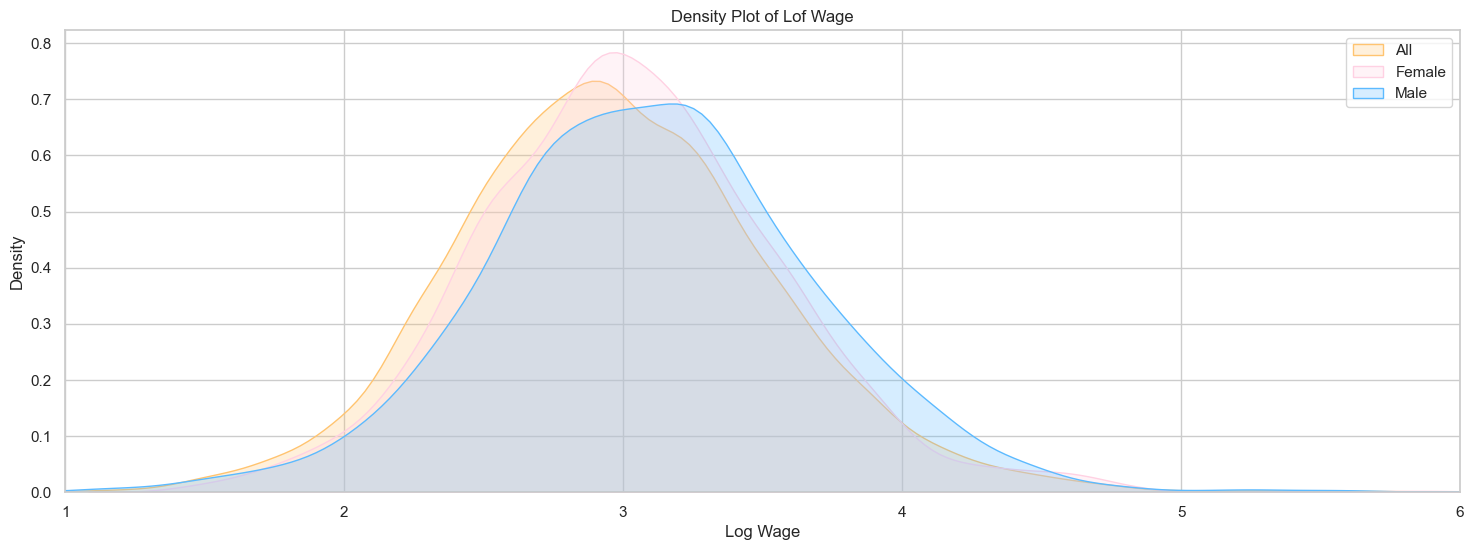

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 6))


sns.kdeplot(data['lwage'], shade=True, color=color_all)
sns.kdeplot(data_female['lwage'], shade=True, color=color_female)
sns.kdeplot(data_male['lwage'], shade=True, color=color_male)

plt.legend(labels=['All','Female' , 'Male'])

plt.xlabel('Log Wage')
plt.ylabel('Density')
plt.title('Density Plot of Lof Wage')
plt.xlim(1, 6)

plt.show()


We can see that compared to salary, lwage is more similar to a normal distribution

#### Sex

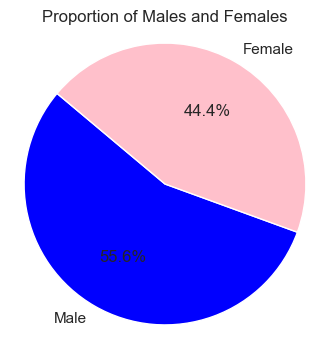

In [19]:
sex_counts = data['sex'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(sex_counts.values, labels=['Male', 'Female'], colors=['blue', 'pink'], autopct='%1.1f%%', startangle=140)

plt.title('Proportion of Males and Females')

plt.axis('equal') 
plt.show()

### Some College -  College Graduate - Advanced Degree

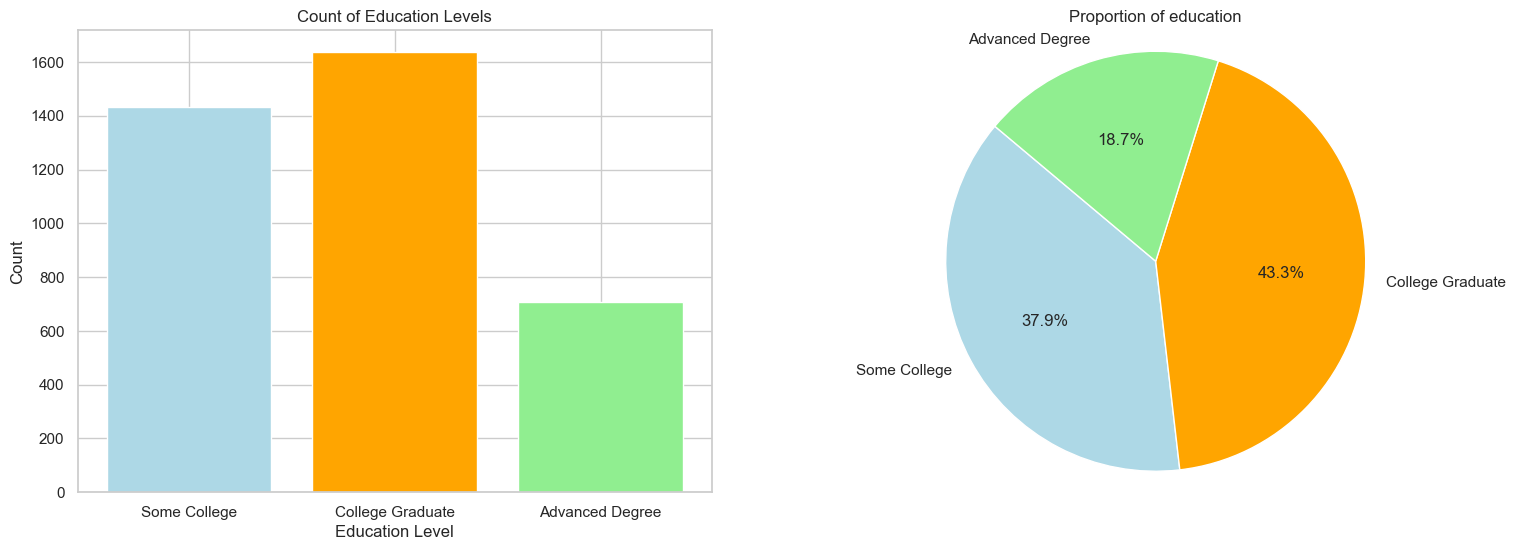

In [20]:
education_counts = data[['scl', 'clg', 'ad']].sum()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.bar(education_counts.index, education_counts.values, color=['lightblue', 'orange', 'lightgreen'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.xticks([0, 1, 2], ['Some College', 'College Graduate', 'Advanced Degree'])

plt.subplot(1, 2, 2)
plt.pie(education_counts.values, labels=['Some College', 'College Graduate', 'Advanced Degree'], colors=['lightblue', 'orange', 'lightgreen'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of education')
plt.axis('equal')

plt.show()

In [21]:
# Crear una nueva columna categórica en base a las variables dummy de educación
data_filtered['education_level'] = 'none'
data_filtered.loc[data_filtered['scl'] == 1, 'education_level'] = 1
data_filtered.loc[data_filtered['clg'] == 1, 'education_level'] = 2
data_filtered.loc[data_filtered['ad'] == 1, 'education_level'] = 3

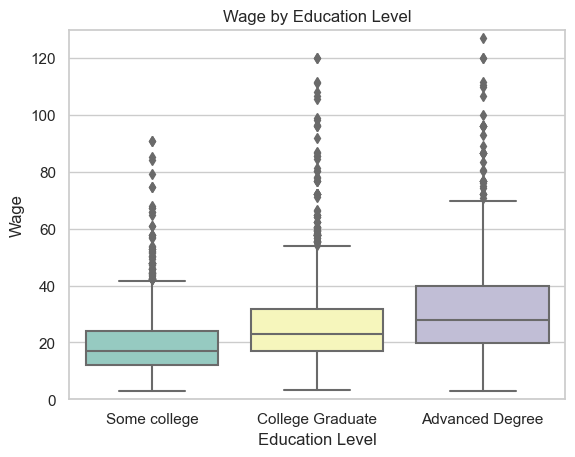

In [22]:
sns.set(style="whitegrid")

sns.boxplot(x=data_filtered['education_level'], y='wage', data=data_filtered, palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Wage')
plt.title('Wage by Education Level')
plt.ylim(0,130)

plt.xticks([0, 1, 2], ['Some college', 'College Graduate', 'Advanced Degree'])

plt.show()

As expected, those with an advanced degree have a higher mean wage than the other two education groups

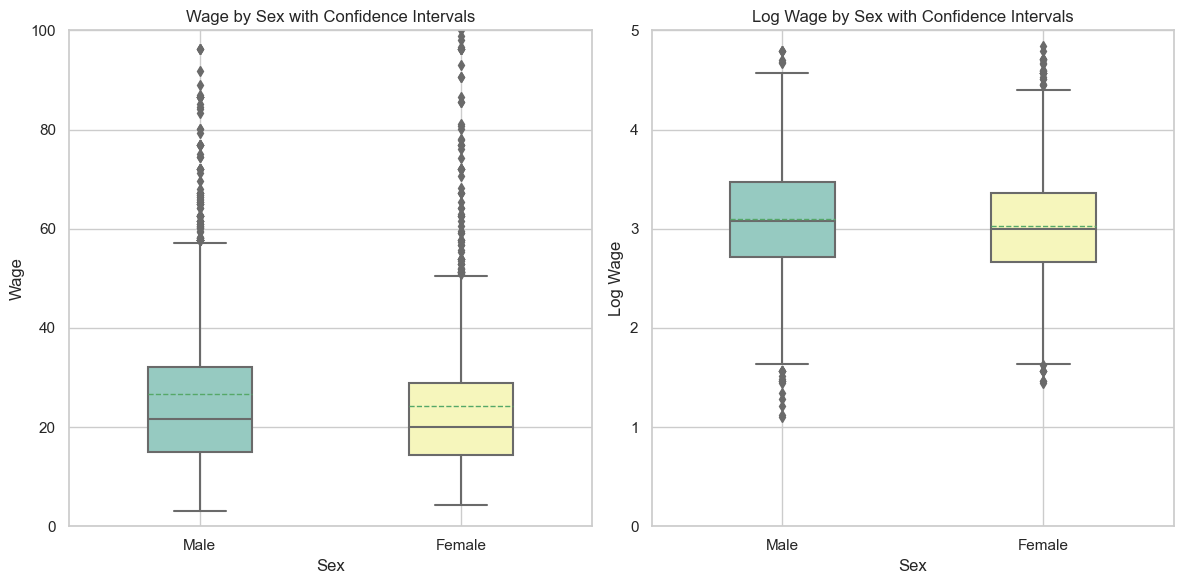

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Graphic  Wage
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='wage', data=data_filtered, width=0.4, showmeans=True, meanline=True, palette='Set3')
plt.xlabel('Sex')
plt.ylabel('Wage')
plt.title('Wage by Sex with Confidence Intervals')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylim(0,100)
plt.grid(True)

# Graphic Log Wage
plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='lwage', data=data_filtered, width=0.4, showmeans=True, meanline=True, palette='Set3')
plt.xlabel('Sex')
plt.ylabel('Log Wage')
plt.title('Log Wage by Sex with Confidence Intervals')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylim(0,5)
plt.grid(True)

plt.tight_layout()

plt.show()

In these two plots, it can be seen that the mean wage  and mean lwage between men and women is not very different. This could be due to the fact that the sample now only includes individuals with some type of university education.

### Experience

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\4223710098.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_male['exp1'], shade=True, color=color_male)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\4223710098.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_female['exp1'], shade=True, color=color_female)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\4223710098.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['exp1'], shade=True, color=color_all)


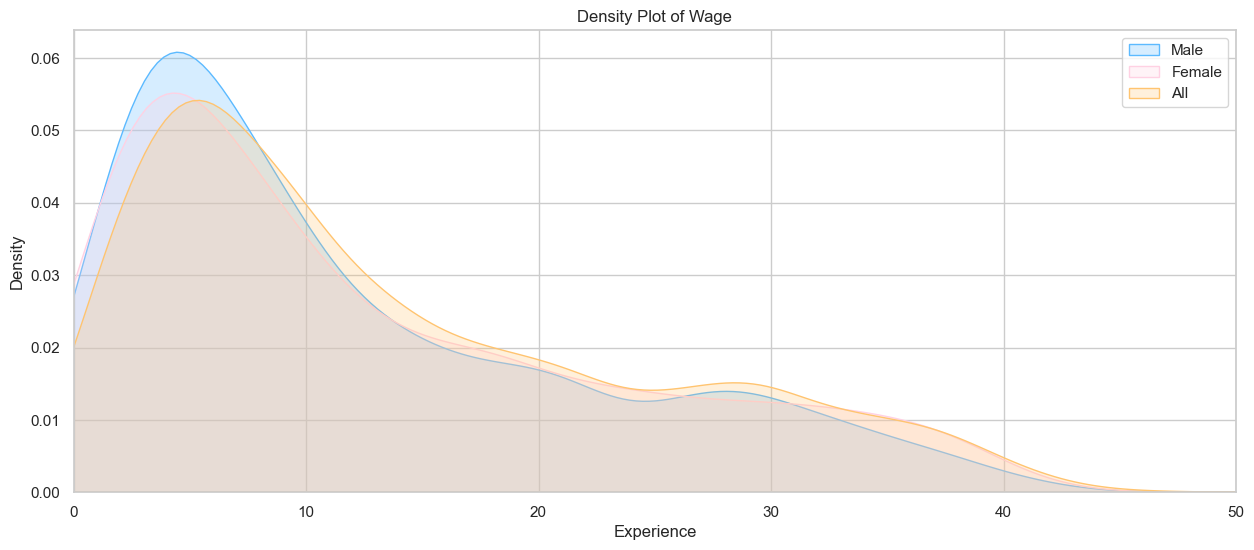

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.kdeplot(data_male['exp1'], shade=True, color=color_male)
sns.kdeplot(data_female['exp1'], shade=True, color=color_female)
sns.kdeplot(data['exp1'], shade=True, color=color_all)

plt.legend(labels=['Male','Female', 'All'])

plt.xlabel('Experience')
plt.ylabel('Density')
plt.title('Density Plot of Wage')
plt.xlim(0, 50)

plt.show()

The experience doesn't folllow a normal distribution

### Confidence Intervals of sex's coefficient

In [25]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data_filtered )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
print(nocontrol_est)

# confidence interval
ll_nocontrol = nocontrol_model.fit().conf_int( alpha=0.05 ).iloc[1, 0]
ll_nocontrol

-0.07503200512595651


-0.11105562342754066

In [26]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'
control_model = smf.ols( formula = flex, data = data_filtered )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']
print(control_est)

# confidence interval
ll_control = control_model.fit().conf_int( alpha=0.05 ).loc[['sex']].iloc[0, 0]
ll_control

-0.06753064145068145


-0.10181011611631216

In [27]:
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)' 

t_Y = smf.ols( formula = flex_y , data = data_filtered ).fit().resid

t_D = smf.ols( formula = flex_d , data = data_filtered ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )

partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

# confidence interval
ll_partial = partial_fit.conf_int(alpha=0.05).iloc[1, 0]
ll_partial

-0.10071084672172739

In [28]:
err_nocontrol = nocontrol_est - ll_nocontrol
err_control = control_est - ll_control
err_partial = partial_est - ll_partial

In [29]:
coef = [nocontrol_est,control_est, partial_est]
err = [err_nocontrol,err_control, err_partial]
varname = ["No control", "Control", "Partial"]

In [30]:
coef_df = pd.DataFrame({'coef': coef,
                        'err': err,
                        'varname': varname
                       })

coef_df 

,coef,err,varname
0,-0.075032,0.036024,No control
1,-0.067531,0.034279,Control
2,-0.067520,0.033191,Partial


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\1035246995.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


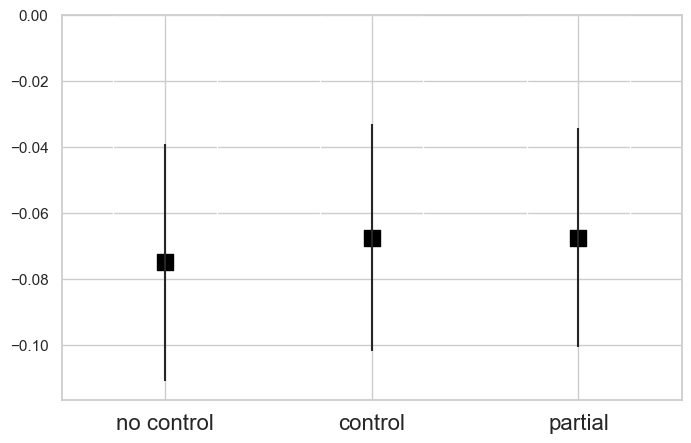

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['no control','control','partial'], 
                       rotation=0, fontsize=16)

Explanation

### Replication of the next figure

In [32]:
#PREDICTING LOG SALARY FOR COLLEGE GRADUATES - male
data_clg_male= data[(data['clg'] == 1) & (data['sex'] == 0 )]

flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'

control_model_clg_male = smf.ols(formula=flex, data=data_clg_male)
control_model_clg_fit_male = control_model_clg_male.fit()

data_clg_male['predicted Lwage'] = control_model_clg_fit_male.predict(data_clg_male)

predicted_lwage_clg_male_mean = data_clg_male.groupby('exp1')['predicted Lwage'].mean()
actual_lwage_clg_male_mean = data_clg_male.groupby('exp1')['lwage'].mean()
actual_lwage_clg_male_std = data_clg_male['lwage'].std()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\2982150139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clg_male['predicted Lwage'] = control_model_clg_fit_male.predict(data_clg_male)


In [33]:
#PREDICTING LOG SALARY FOR HIGH SCHOOL GRADUATES - male
data_hsg_male= data[(data['hsg'] == 1) & (data['sex'] == 0 )]

flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'

control_model_hsg_male = smf.ols(formula=flex, data=data_hsg_male)
control_model_hsg_fit_male = control_model_hsg_male.fit()

data_hsg_male['predicted Lwage'] = control_model_hsg_fit_male.predict(data_hsg_male)

predicted_lwage_hsg_male_mean = data_hsg_male.groupby('exp1')['predicted Lwage'].mean()
actual_lwage_hsg_male_mean = data_hsg_male.groupby('exp1')['lwage'].mean()
actual_lwage_hsg_male_std = data_hsg_male['lwage'].std()
actual_lwage_hsg_male_std
#print(predicted_lwage_hsg_male_mean)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\1920401199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hsg_male['predicted Lwage'] = control_model_hsg_fit_male.predict(data_hsg_male)


0.4829208342175958

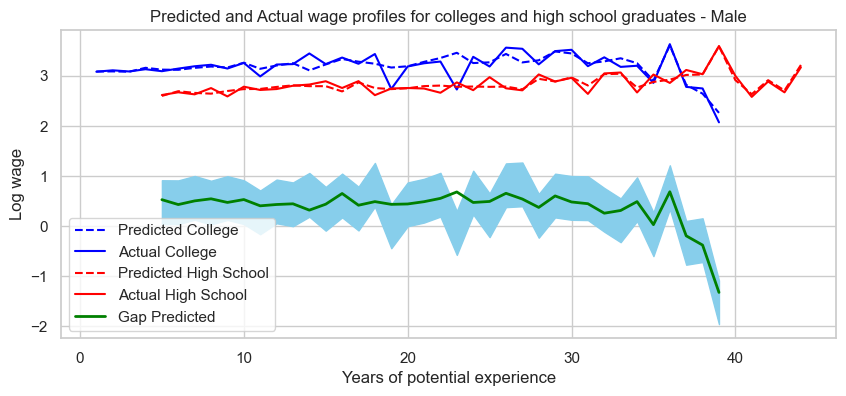

In [34]:

plt.figure(figsize=(10, 4))

# Graficar las líneas para graduados universitarios
plt.plot(predicted_lwage_clg_male_mean.index, predicted_lwage_clg_male_mean.values, label='Predicted College', linestyle='--', color='blue')
plt.plot(actual_lwage_clg_male_mean.index, actual_lwage_clg_male_mean.values, label='Actual College', color='blue')

# Graficar las líneas para graduados de secundaria
plt.plot(predicted_lwage_hsg_male_mean.index, predicted_lwage_hsg_male_mean.values, label='Predicted High School', linestyle='--', color='red')
plt.plot(actual_lwage_hsg_male_mean.index, actual_lwage_hsg_male_mean.values, label='Actual High School', color='red')

# Alinear los índices para calcular el gap entre los salarios predichos
aligned_index = predicted_lwage_clg_male_mean.index.intersection(predicted_lwage_hsg_male_mean.index)
predicted_gap_male = predicted_lwage_clg_male_mean.loc[aligned_index].values - predicted_lwage_hsg_male_mean.loc[aligned_index].values
actual_gap_male= actual_lwage_clg_male_mean.loc[aligned_index].values - actual_lwage_hsg_male_mean.loc[aligned_index].values

# Calcular el límite inferior y superior para la desviación estándar
actual_gap_male_std = actual_gap_male.std()
ll = actual_gap_male - actual_gap_male_std
ul = actual_gap_male + actual_gap_male_std

# Graficar el gap entre los salarios predichos
plt.plot(aligned_index, predicted_gap_male, label='Gap Predicted', color='green', linewidth=2)
plt.fill_between(aligned_index, ll, ul, color="skyblue")
plt.xlabel('Years of potential experience')
plt.ylabel('Log wage')

plt.title('Predicted and Actual wage profiles for colleges and high school graduates - Male')
plt.legend()
plt.grid(True)


graphic_male = plt.gcf()

plt.show()


In this graph, 68% confidence intervals are used. It can be clearly seen in this graph the gap that exists between those with university education and those with secondary education

In [35]:
#PREDICTING LOG SALARY FOR COLLEGE GRADUATES female
data_clg_female= data[(data['clg'] == 1) & (data['sex'] == 1 )]

flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'

control_model_clg_female = smf.ols(formula=flex, data=data_clg_female)
control_model_clg_fit_female = control_model_clg_female.fit()

data_clg_female['predicted Lwage'] = control_model_clg_fit_female.predict(data_clg_female)

predicted_lwage_clg_female_mean = data_clg_female.groupby('exp1')['predicted Lwage'].mean()
actual_lwage_clg_female_mean = data_clg_female.groupby('exp1')['lwage'].mean()
actual_lwage_clg_female_std = data_clg_female['lwage'].std()

actual_lwage_clg_female_std
#print(predicted_lwage_clg_female_mean)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\33440915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clg_female['predicted Lwage'] = control_model_clg_fit_female.predict(data_clg_female)


0.48860511133649176

In [36]:
#PREDICTING LOG SALARY FOR HIGH SCHOOL GRADUATES - female
data_hsg_female= data[(data['hsg'] == 1) & (data['sex'] == 1 )]

flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'

control_model_hsg_female = smf.ols(formula=flex, data=data_hsg_female)
control_model_hsg_fit_female = control_model_hsg_female.fit()

data_hsg_female['predicted Lwage'] = control_model_hsg_fit_female.predict(data_hsg_female)

predicted_lwage_hsg_female_mean = data_hsg_female.groupby('exp1')['predicted Lwage'].mean()
actual_lwage_hsg_female_mean = data_hsg_female.groupby('exp1')['lwage'].mean()
actual_lwage_hsg_female_std = data_hsg_female['lwage'].std()
#print(predicted_lwage_hsg_female_mean)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13788\364275007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hsg_female['predicted Lwage'] = control_model_hsg_fit_female.predict(data_hsg_female)


### Graphics

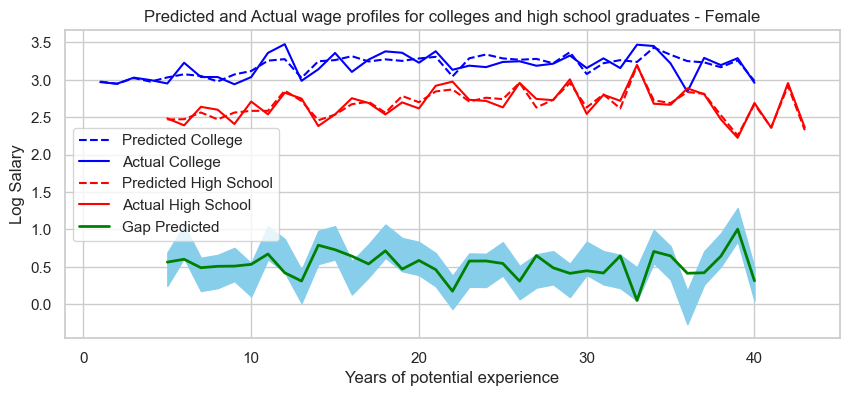

In [37]:
plt.figure(figsize=(10, 4))

plt.plot(predicted_lwage_clg_female_mean.index, predicted_lwage_clg_female_mean.values, label='Predicted College', linestyle='--', color='blue')
plt.plot(actual_lwage_clg_female_mean.index, actual_lwage_clg_female_mean.values, label='Actual College', color='blue')

# Graficar las líneas para graduadas de secundaria
plt.plot(predicted_lwage_hsg_female_mean.index, predicted_lwage_hsg_female_mean.values, label='Predicted High School', linestyle='--', color='red')
plt.plot(actual_lwage_hsg_female_mean.index, actual_lwage_hsg_female_mean.values, label='Actual High School', color='red')

#Alinear los índices para calcular el gap entre los salarios predichos
aligned_index = predicted_lwage_clg_female_mean.index.intersection(predicted_lwage_hsg_female_mean.index)
predicted_gap_female = predicted_lwage_clg_female_mean.loc[aligned_index].values - predicted_lwage_hsg_female_mean.loc[aligned_index].values
actual_gap_female= actual_lwage_clg_female_mean.loc[aligned_index].values - actual_lwage_hsg_female_mean.loc[aligned_index].values

# Calcular el límite inferior y superior para la desviación estándar
actual_gap_female_std = actual_gap_female.std()
ll = actual_gap_female -  actual_gap_female_std
ul = actual_gap_female +  actual_gap_female_std


# Graficar el gap entre los salarios predichos
plt.plot(aligned_index, predicted_gap_female, label='Gap Predicted', color='green', linewidth=2)
plt.fill_between(aligned_index, ll, ul, color="skyblue")
plt.xlabel('Years of potential experience')
plt.ylabel('Log Salary')


plt.xlabel('Years of potential experience')
plt.ylabel('Log Salary')
plt.title('Predicted and Actual wage profiles for colleges and high school graduates - Female')
plt.legend()
plt.grid(True)

plt.show()


# PART 3

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [38]:
file_path = "wage2015_subsample_inference.csv"
data = pd.read_csv(file_path).dropna()
data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


In [39]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
alphas

[0.1, 0.2, 0.3, 0.4, 0.5]

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
kf
fold_indices = [(train_index, test_index) for train_index, test_index in kf.split(data)]
fold_indices

[(array([   0,    1,    2, ..., 5146, 5147, 5149]),
  array([  11,   12,   15, ..., 5140, 5145, 5148])),
 (array([   0,    1,    2, ..., 5147, 5148, 5149]),
  array([   4,    9,   10, ..., 5137, 5138, 5144])),
 (array([   2,    3,    4, ..., 5146, 5147, 5148]),
  array([   0,    1,    5, ..., 5136, 5143, 5149])),
 (array([   0,    1,    2, ..., 5147, 5148, 5149]),
  array([   6,    7,   19, ..., 5119, 5134, 5146])),
 (array([   0,    1,    4, ..., 5146, 5148, 5149]),
  array([   2,    3,    8, ..., 5141, 5142, 5147]))]

In [43]:
mse = np.zeros((len(alphas), 5))
mse

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [44]:
for i, alpha in enumerate(alphas):
    for fold, (train_index, test_index) in enumerate(fold_indices):
        X_train = data.iloc[train_index, :-1].values
        y_train = data.iloc[train_index, -1].values
        X_test = data.iloc[test_index, :-1].values
        y_test = data.iloc[test_index, -1].values

        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse[i, fold] = mean_squared_error(y_test, y_pred)

In [45]:
avg_mse = np.mean(mse, axis=1)

avg_mse

array([23.59215758, 23.95358903, 24.17381193, 24.4756724 , 24.64133419])

In [46]:
optimal_alpha = alphas[np.argmin(avg_mse)]

In [47]:
final_model = Lasso(alpha=optimal_alpha)
final_model.fit(data.iloc[:, :-1].values, data.iloc[:, -1].values)
final_predictions = final_model.predict(data.iloc[:, :-1].values)
final_mse = mean_squared_error(data.iloc[:, -1].values, final_predictions)

final_model


Lasso(alpha=0.1)

In [48]:
final_predictions

array([15.39102642, 11.54490026,  9.03501133, ..., 13.14881261,
       12.7632015 , 14.96482717])

In [49]:
final_mse

23.077025477644625

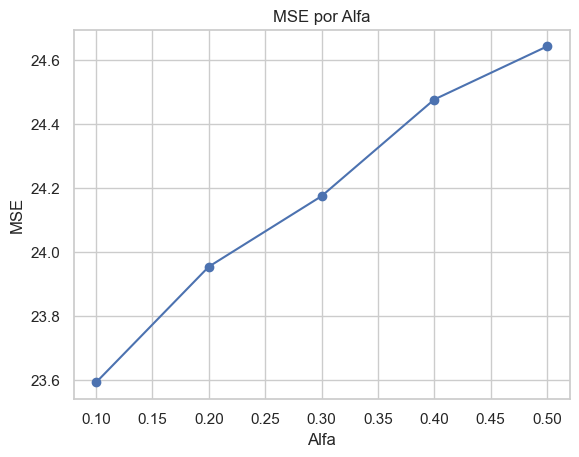

In [50]:
plt.figure()
plt.plot(alphas, avg_mse, marker='o')
plt.title('MSE por Alfa')
plt.xlabel('Alfa')
plt.ylabel('MSE')
plt.show()

In [51]:
print("El valor de alfa óptimo es:", optimal_alpha)
print("MSE del conjunto de prueba para el modelo final:", final_mse)

El valor de alfa óptimo es: 0.1
MSE del conjunto de prueba para el modelo final: 23.077025477644625
